In [7]:
from scipy.stats import chisquare
from scipy import stats
import urllib.request
import string
import requests
from bs4 import BeautifulSoup
import pandas as pd
import multiprocessing
import gensim
import sys
import nltk
# import spacy
# nlp=spacy.load('en')
# nlp = spacy.load('en_coref_sm')  
import seaborn as sns
from nltk.tokenize import WordPunctTokenizer
tknzr = WordPunctTokenizer()
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from scipy import spatial
from collections import Counter
import numpy as np
from collections import defaultdict
from pprint import pprint
from gensim import corpora
import re
import logging
import requests
import urllib 
import re
import sys
import zipfile
from glob import glob
import statsmodels.api as sm
import scipy
import scipy.stats as ss
from scipy.signal import savgol_filter
import random
# np.set_printoptions(precision=4)
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

import matplotlib.pyplot as plt
# %matplotlib inline
import bezier

from sklearn import metrics
from sklearn.cluster import KMeans
# from the demo
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from nltk.corpus import stopwords
from nltk.corpus import names
from scipy.stats import norm   
from itertools import combinations
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [2]:
# Load your usual SpaCy model (one of SpaCy English models)
import spacy
nlp = spacy.load('en')

# load NeuralCoref and add it to the pipe of SpaCy's model
import neuralcoref
coref = neuralcoref.NeuralCoref(nlp.vocab)
nlp.add_pipe(coref, name='neuralcoref')

2019-06-10 18:56:59,897 : INFO : Loading model from /Users/xuhuimin/.neuralcoref_cache/neuralcoref


In [3]:
def flushPrint(s):
    sys.stdout.write('\r')
    sys.stdout.write('%s' % s)
    sys.stdout.flush()
    
def normalize(v):
    norm = np.linalg.norm(v)
    if norm == 0:
        return v
    return v / norm

def cultureD2(model, words):
    cultures = []
    for word in words:
        if (word[0] in model.wv.vocab) & (word[1] in model.wv.vocab):
            cultures.append(normalize(normalize(model[word[0]]) - normalize(model[word[1]])))
        else:
            print(word)
    culturev = normalize(np.mean(cultures, axis=0))
    return culturev

def storyv(model,words):
    veclist=[]
    for w in words:
        if w in model.wv.vocab:
            veclist.append(normalize(model[w]))
    storyv=normalize(np.mean(veclist,axis=0))
    return storyv

def projection(storyv, culturev):
    # cosine similarity
    return (1 - spatial.distance.cosine(storyv, culturev))
           
def cosine2angle(i):
    return np.arccos(i) / np.pi * 180 #长度换角度

def normalized(x):
    x= np.array(x)
    return (x-np.mean(x))/np.std(x)

def normalization(x):
    x=np.array(x)
    return (x-np.min(x))/(np.max(x)-np.min(x))

In [4]:
def pre_process(data):
    for w in abbreviations:
        data = data.replace(w,' ')
    data = data.replace('\r',' ').replace('\n',' ').replace('\t',' ')
    data = re.split('[.?!]',data) # cut the sentence
    tknzr = WordPunctTokenizer()
    data = [tknzr.tokenize(i) for i in data]
    data=[i for i in data if len(i)>1]
    return data

In [5]:
def word_to_emotion(data):
    w=[]
    for da in data:
        d=[]
        for word in da:
            try:
                if (word.lower() not in stopword):#&(word not in names):
                    sim = 90-cosine2angle(projection(model[word],success_vector))
                    if (sim<-3)|(sim>3):
                        d.append(sim)
            except:
                pass
        w.append(np.mean(d))
    return w

In [6]:
import re, sys, getopt

PUNCTUATION = [ch for ch in """(){}[]<>!?.:;,`'"@#$%^&*+-|=~/\\_"""]
LETTERS     = [ch for ch in "abcdefghijklmnopqrstuvwxyz"]
CONSONANTS  = [ch for ch in "bcdfghjklmnpqrstvwxz"] # Need this for Mr. Mss. abbreviations.
WHITESPACE  = [ch for ch in " \t\n\r\f\v"]          # Need this to split words.
DASHES      = [ch for ch in u"鈥撯€�"]                  # Not to be confused with hyphen.

is_uppercase   = lambda s: len(s)>0 and s==s.upper()                          # Goodbye => True
is_capitalized = lambda s: len(s)>0 and s[0].isalpha() and s[0]==s[0].upper() # GOODBYE => True

digits = re.compile("^[0-9]+$")
is_int = lambda s: digits.search(s) != None

# regex pattern for entities: &amp; &#164;
entity = "&[a-z]+;|&#[0-9]+;"

class Range(dict):
    
    def __init__(self, items=[]):
        dict.__init__(self, items)
        self.patterns = []
        
    def __contains__(self, str):
        if dict.__contains__(self, str): 
            return True
        for p in self.patterns:
            if p.search(str) != None: 
                return True
        return False

def in_any(word, ranges=[]):
    for rng in ranges:
        if word in rng: return True
        
abbreviations = [
    "Adm.", "Ala.", "Ariz.", "Ark.", "Aug.", "B.C.", "Bancorp.", "Bhd.", "Brig.", "Bros.", "CO.", 
    "CORP.", "COS.", "ca.", "Calif.", "Capt.", "Cie.", "Cmdr.", "Co.", "Col.", "Colo.", "Conn.", "Corp.", 
    "Cos.", "Cpl.", "D-Mass.", "D.C.", "Dec.", "Del.", "Dept.", "Dr.", "E.g.", "Etc.", "Ex.", "Exch.", 
    "Feb.", "Fla.", "Fri.", "Ga.", "Gen.", "Gov.", "INC.", "Ill.", "Inc.", "Ind.", "Jan.", "Jansz.", 
    "Jos.", "Jr.", "Kan.", "Ky.", "L.A.", "La.", "Lt.", "Ltd.", "Maj.", "Mass.", "Md.", "Messrs.", 
    "Mfg.", "Mich.", "Minn.", "Miss.", "Mo.", "Mon.", "Mr.", "Mrs.", "Ms.", "Mt.", "N.C.", "N.J.", 
    "N.Y.", "NFATc.", "Neb.", "Nev.", "No.", "Nos.", "Nov.", "O.J.", "Oct.", "Okla.", "Ont.", "Ore.", 
    "P.T.", "Pa.", "Ph.", "Prof.", "Prop.", "Pty.", "R.I.", "R.J.", "Rep.", "Reps.", "Rev.", "S.C.", 
    "Sat.", "Sen.", "Sens.", "Sep.", "Sept.", "Sgt.", "Sol.", "Sr.", "St.", "Sun.", "Tenn.", "Tex.", 
    "Thu.", "Tue.", "U.K.", "U.N.", "U.S.", "Va.", "Vt.", "W.J.", "W.Va.", "Wash.", "Wed.", "Wis.", 
    "Wyo.", "a.m.", "cit.", "def.", "ed.", "eds.", "e.g.", "etc.", "ft.", "i.e.", "op.", "p.m.", "pp.", 
    "sc.", "v.", "vs.", "Biol.", "Chem.", "beta4.", "Struct.", "Funct.", "Natl.", "Acad.", "Sci.",
    "Biochem.", "Cell.", "Proc.", "Res.", "Lond.", "Nat.", "Dev.", "Camb.", "Profilin.", "Thymosin-beta4."
]

# class Abbreviations(Range):
    
#     def __init__(self, known=[]):
#         """ A dictionary of known abbreviations, extended with patterns of likely abbreviations.
#             word in Abbreviations() == True if word is a known or likely abbreviation.
#             Periods in English are ambiguous,
#             marking end of sentence, abbreviation, decimal point or ellipsis.
#             - Simple rule: "every point is a sentence break" is 93.20% correct for Brown corpus.
#             - Fix decimal points: 93,64% correct.
#             - Fix single letter abbreviations (T. De Smedt), alternating letters (i.e. U.S.),
#               and capital letter followed by consonants (Mr. Assn.): 97.7% correct.
#             - Fix with dictionary of known abbreviations: up to 99,07 accuracy.
#             http://bulba.sdsu.edu/~malouf/ling571/13-token-bw.pdf
#         """
#         Range.__init__(self, [(x,True) for x in known])
#         self.patterns = [
#             re.compile("^[A-Za-z]\.$"),                       # single letter, "T. De Smedt"
#             re.compile("^([A-Za-z]\.)+$"),                    # alternating letters, "U.S."
#             #re.compile(".+\.[,;]$"),                         # followed by punctuation, "dept.,"
#             re.compile("^[A-Z]["+"|".join(CONSONANTS)+"]+.$") # capital followed by consonants, "Mr."
#         ]
        
#     def __contains__(self, word):
#         return word.endswith(".") and Range.__contains__(self, word)

# abbreviations = Abbreviations(abbreviations)
# # from https://www.clips.uantwerpen.be/BiographTA/tokenizer.py

In [7]:
swords = [
    ['success','failure'],
    ['succeed','fail'],
    ['lucky', 'unlucky'],
    ['fortunate', 'unfortunate'],
    ['happy', 'unhappy'],
    ['glad', 'sad'],
    ['joy', 'sorrow'],
    ['smile', 'tear']
] # success words

In [8]:
# Load Google's pre-trained Word2Vec model.
# model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin',binary=True)

In [10]:
def flushPrint(s):
    sys.stdout.write('\r')
    sys.stdout.write('%s' % s)
    sys.stdout.flush()

In [10]:
# 获取名字，性别数据列表
male_names = [name for name in names.words('male.txt')]
female_names = [name for name in names.words('female.txt')]
names=male_names+female_names

In [11]:
with open('./stopword.txt','r') as f:
    stopword=f.readlines()
stopword=[i.split('\n')[0] for i in stopword]

In [12]:
IMDB=pd.read_csv('./IMDB/IMDB_e2.csv')

In [11]:
def eval_(x):
    try:
        return eval(x)
    except:
        return np.nan
        pass

In [14]:
IMDB['tp']=IMDB['tp'].apply(lambda x: eval_(x))
IMDB['emotion']=IMDB['emotion'].apply(lambda x: eval_(x))
IMDB['character']=IMDB['character'].apply(lambda x: eval_(x))

In [15]:
IMDB=IMDB.dropna(axis=0,how='any',subset=['lead_gender','tp','emotion'])

In [16]:
# len(IMDB)

In [82]:
all_pos=[]
gap=5
for i,n in enumerate(IMDB['tconst'].values):
    try:
        flushPrint(i)
        with open ('./IMDB/synopsis/'+n[2:]+'.txt','r') as f:
            data=f.read()
        male=IMDB[IMDB['tconst']==n]['character'].values[0][0]
        female=IMDB[IMDB['tconst']==n]['character'].values[0][1]
        doc1=nlp(data)._.coref_resolved
        doc1=pre_process(doc1)
        
        female_all=[]
        for i in doc1:
            i=[j for j in i if (len(j)>1) & (j not in string.punctuation)]
            indices = (j for j,word in enumerate(i) if word==female)
            neighbors = []
            for ind in indices:
                if ind<gap:
                    a=i[0:ind]+i[ind+1:ind+1+gap]
                    neighbors.append([j.lower() for j in a if (j not in names) &(j.lower() not in stopword)])
                else:
                    neighbors.append([j.lower() for j in i[ind-gap:ind]+i[ind+1:ind+1+gap] if (j not in names) &(j.lower() not in stopword)])
            female_all.append(neighbors)

        male_all=[]
        for i in doc1:
            i=[j for j in i if (len(j)>1) & (j not in string.punctuation)]
            indices = (j for j,word in enumerate(i) if word==male)
            neighbors = []
            for ind in indices:
                if ind<gap:
                    a=i[0:ind]+i[ind+1:ind+1+gap]
                    neighbors.append([j.lower() for j in a if (j not in names) &(j.lower() not in stopword)])
                else:
                    neighbors.append([j.lower() for j in i[ind-gap:ind]+i[ind+1:ind+1+gap] if (j not in names) &(j.lower() not in stopword)])
            male_all.append(neighbors)
            
        all_pos.append([n,female_all,male_all])
    except Exception as e:
        print(e)
        pass  

2

KeyboardInterrupt: 

In [64]:
file=[i[0] for i in all_pos]
female_all=[i[1] for i in all_pos]
male_all=[i[2] for i in all_pos]

diction1=dict(zip(file,female_all))
diction2=dict(zip(file,male_all))

IMDB['female_all']=IMDB['tconst'].apply(lambda x: diction1[x] if x in diction1 else np.nan)
IMDB['male_all']=IMDB['tconst'].apply(lambda x: diction2[x] if x in diction2 else np.nan)

In [9]:
IMDB.to_csv('./IMDB/IMDB_e2.csv',index=False)

NameError: name 'IMDB' is not defined

In [48]:
# all_pos=[]
# gap=5
# for i,n in enumerate(IMDB['tconst'].values):
#     try:
#         flushPrint(i)
#         with open ('./IMDB/synopsis/'+n[2:]+'.txt','r') as f:
#             data=f.read()
#         male=IMDB[IMDB['tconst']==n]['character'].values[0][0]
#         female=IMDB[IMDB['tconst']==n]['character'].values[0][1]
#         doc1=nlp(data)._.coref_resolved
#         doc1=pre_process(doc1)

#         female_adj=[]
#         female_verb=[]
#         for i in doc1:
#             indices = (j for j,word in enumerate(i) if word==female)
#             neighbors_a = []
#             neighbors_v = []
#             for ind in indices:
#                 pos_tags = nltk.pos_tag(i[ind-gap:ind]+i[ind+1:ind+1+gap])
#                 for word,pos in pos_tags:
#                     if (pos == 'JJ' or pos == 'JJR' or pos == 'JJS' or 'VA')&(word not in neighbors_a)&(len(word)>1):
#                         neighbors_a.append(word)
#                     if (pos == 'VB' or pos == 'VBD' or pos == 'VBG' or pos == 'VBN' or pos == 'VBP' or pos == 'VBZ')&(word not in neighbors_v)&(len(word)>1):
#                         neighbors_v.append(word)
#             female_adj.append(neighbors_a)
#             female_verb.append(neighbors_v)

#         male_adj=[]
#         male_verb=[]
#         for i in doc1:
#             indices = (j for j,word in enumerate(i) if word==male)
#             neighbors_a = []
#             neighbors_v = []
#             for ind in indices:
#                 pos_tags = nltk.pos_tag(i[ind-gap:ind]+i[ind+1:ind+1+gap])
#                 for word,pos in pos_tags:
#                     if (pos == 'JJ' or pos == 'JJR' or pos == 'JJS' or 'VA')&(word not in neighbors_a)&(len(word)>1):
#                         neighbors_a.append(word)
#                     if (pos == 'VB' or pos == 'VBD' or pos == 'VBG' or pos == 'VBN' or pos == 'VBP' or pos == 'VBZ')&(word not in neighbors_v)&(len(word)>1):
#                         neighbors_v.append(word)
#             male_adj.append(neighbors_a)
#             male_verb.append(neighbors_v)
#         all_pos.append([n,female_adj,female_verb,male_adj,male_verb])
#     except Exception as e:
#         print(e)
#         pass  

6

KeyboardInterrupt: 

In [51]:
# file=[i[0] for i in all_pos]
# female_adj=[i[1] for i in all_pos]
# female_verb=[i[2] for i in all_pos]
# male_adj=[i[3] for i in all_pos]
# male_verb=[i[4] for i in all_pos]

# diction1=dict(zip(file,female_adj))
# diction2=dict(zip(file,female_verb))
# diction3=dict(zip(file,male_adj))
# diction4=dict(zip(file,male_verb))


# IMDB['female_adj']=IMDB['tconst'].apply(lambda x: diction1[x] if x in diction1 else np.nan)
# IMDB['female_verb']=IMDB['tconst'].apply(lambda x: diction2[x] if x in diction2 else np.nan)
# IMDB['male_adj']=IMDB['tconst'].apply(lambda x: diction3[x] if x in diction3 else np.nan)
# IMDB['male_verb']=IMDB['tconst'].apply(lambda x: diction4[x] if x in diction4 else np.nan)

In [16]:
# import spacy
# from spacy.symbols import nsubj, nsubjpass, csubj, csubjpass, agent, expl, VERB
# nlp1 = spacy.load("en_core_web_sm")

In [16]:
# all_pos=[]
# for i,n in enumerate(IMDB['tconst'].values):
#     try:
#         flushPrint(i)
#         with open ('./IMDB/synopsis/'+n[2:]+'.txt','r') as f:
#             data=f.read()
#         male=IMDB[IMDB['tconst']==n]['character'].values[0][0]
#         female=IMDB[IMDB['tconst']==n]['character'].values[0][1]
#         doc1=nlp(data)._.coref_resolved
#         doc1=pre_process(doc1)

#         m_verbs=[]
#         f_verbs=[]
#         m_adjs=[]
#         f_adjs=[]
#         for i in range(len(doc1)):
#             m_verb=[]
#             f_verb=[]
#             m_adj=[]
#             f_adj=[]
#             doc = nlp1(' '.join(doc1[i]))
#             for token in doc:
#                 if male in token.string:
#                     if (token.dep == nsubj or agent)and token.head.pos == VERB:
#                         m_verb.append(token.head)
#                         a=[i for i in token.children if i.pos_== 'ADJ']
#                         b=[i for i in token.head.children if i.pos_== 'ADJ']
#                         m_adj.extend(a+b)
#                 if female in token.string:
#                     if (token.dep == nsubj or agent)and token.head.pos == VERB:
#                         f_verb.append(token.head)
#                         a=[i for i in token.children if i.pos_== 'ADJ']
#                         b=[i for i in token.head.children if i.pos_== 'ADJ']
#                         f_adj.extend(a+b)
#             m_verbs.append(m_verb)
#             f_verbs.append(f_verb)
#             m_adjs.append(m_adj)
#             f_adjs.append(f_adj)
#         all_pos.append([n,m_verbs,f_verbs,m_adjs,f_adjs])
#     except Exception as e:
#         print(e)
#         pass  

2

KeyboardInterrupt: 

In [28]:
# file=[i[0] for i in all_pos]
# m_verbs=[i[1] for i in all_pos]
# f_verbs=[i[2] for i in all_pos]
# m_adjs=[i[3] for i in all_pos]
# f_adjs=[i[4] for i in all_pos]

# diction1=dict(zip(file,m_verbs))
# diction2=dict(zip(file,f_verbs))
# diction3=dict(zip(file,m_adjs))
# diction4=dict(zip(file,f_adjs))


# IMDB['m_verbs']=IMDB['tconst'].apply(lambda x: diction1[x] if x in diction1 else np.nan)
# IMDB['f_verbs']=IMDB['tconst'].apply(lambda x: diction2[x] if x in diction2 else np.nan)
# IMDB['m_adjs']=IMDB['tconst'].apply(lambda x: diction3[x] if x in diction3 else np.nan)
# IMDB['f_adjs']=IMDB['tconst'].apply(lambda x: diction4[x] if x in diction4 else np.nan)

# IMDB.to_csv('./IMDB/IMDB_e2.csv',index=False)

In [8]:
IMDB=pd.read_csv('./IMDB/IMDB_e2.csv')

In [9]:
len(IMDB)

6087

In [12]:
IMDB['tp']=IMDB['tp'].apply(lambda x: eval_(x))
IMDB['emotion']=IMDB['emotion'].apply(lambda x: eval_(x))
IMDB['character']=IMDB['character'].apply(lambda x: eval_(x))
IMDB['female_adj']=IMDB['female_adj'].apply(lambda x: eval_(x))
IMDB['female_verb']=IMDB['female_verb'].apply(lambda x: eval_(x))
IMDB['male_adj']=IMDB['male_adj'].apply(lambda x: eval_(x))
IMDB['male_verb']=IMDB['male_verb'].apply(lambda x: eval_(x))
IMDB['female_all']=IMDB['female_all'].apply(lambda x: eval_(x))
IMDB['male_all']=IMDB['male_all'].apply(lambda x: eval_(x))

In [19]:
def num(x):
    a=[]
    for i,j in enumerate(x):
        if len(j)!=0:
#             print(j)
            a.append(i)
    return a

In [20]:
IMDB['female_a']=IMDB['female_all'].apply(lambda x: num(x))

In [21]:
IMDB['male_a']=IMDB['male_all'].apply(lambda x: num(x))

In [22]:
IMDB.head(1)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,character,tp,emotion,len,lead_gender,count,female_adj,female_verb,male_adj,male_verb,m_verbs,f_verbs,m_adjs,f_adjs,co_n,prob,cum_e,smooth_cum_e,t_p,tp_e,tp_c,k,up,up1,female_all,male_all,female_a,male_a
0,tt0002605,movie,The Adventures of Kathlyn,The Adventures of Kathlyn,0,1913.0,\N,\N,Adventure,5.9,16.0,"[Umballah, Kathlyn, female]","[13, 20, 29, 119, 120, 122, 124, 125, 126, 129...","[0.6526839423322722, -1.4709012343085324, 3.41...",382.0,female,8477,"[[], [pet], [], [large], [mysterious, sister],...","[[], [is, quieted], [], [gives, opened], [is, ...","[[], [], [], [], [], [], [], [], [], [], [], [...","[[], [], [], [], [], [], [], [], [], [], [], [...","[[], [], [], [], [], [], [], [], [], [], [], [...","[[], [], [], [gives], [showing, drops], [], [o...","[[], [], [], [], [], [], [], [], [], [], [], [...","[[], [], [], [], [], [], [], [], [], [], [], [...",49,0.128272,[-5.98034211e-02 -8.08891515e-01 2.94454310e-...,[ -0.62892341 -0.59875299 -0.57021448 -0.54...,"[([0, -0.6289234076773932], [19, -0.3347436029...","[[13, -0.18139431754678803], [20, -2.681952860...","[[[13, -0.18139431754678803], [20, -2.68195286...","[[-0.3572226490338304, [13, 20]], [0, 1], [-0....","[148, 149, 150, 151, 152, 153, 270, 271, 272, ...","[[148, 153], [270, 272], [359, 361]]","[[[episode, unwelcome, throne, hare, daughter,...","[[], [], [], [], [], [], [], [], [], [], [], [...","[0, 1, 3, 4, 6, 7, 8, 9, 11, 12, 13, 14, 15, 1...","[13, 18, 20, 29, 44, 52, 119, 120, 122, 124, 1..."


In [23]:
IMDB.to_csv('./IMDB/IMDB_e2.csv',index=False)

In [27]:
import json
with open("diction.txt","r") as f:
    ediction = json.loads(f.readline())

### all

In [61]:
def extend(x):
    c=[]
    for i in IMDB[x].values:
        a=[]
        [a.extend(j) for j in i]
        c.extend(a)
    return c

In [65]:
female_adj=extend('female_adj')
male_adj=extend('male_adj')
female_verb=extend('female_verb')
male_verb=extend('male_verb')

In [75]:
all_adj=pd.DataFrame(list(set(female_adj)&set(male_adj)),columns=['adj'])

In [78]:
all_adj['score']=all_adj['adj'].apply(lambda x: ediction[x] if x in ediction else np.nan)

In [83]:
def dic(x):
    diction = {}
    cnt = Counter(x)
    for word, freq in cnt.items():
        diction[word] = freq
    return diction

In [91]:
all_adj.head(10)

,adj,score,female_adj,male_adj
0,pacifist,-2.524839,1,1
1,eighteen,0.511039,5,4
2,stop,0.529757,3,10
3,non,-2.839189,17,12
4,wasn,3.056921,1,1
5,minimal,1.134143,2,6
6,abandoned,-11.724227,1,10
7,treacherous,-7.529947,2,10
8,fre,1.180474,6,7
9,bitter,-7.646136,22,21


In [84]:
diction=dic(female_adj)
all_adj['female_adj']=all_adj['adj'].apply(lambda x: diction[x] if x in diction else np.nan)

diction=dic(male_adj)
all_adj['male_adj']=all_adj['adj'].apply(lambda x: diction[x] if x in diction else np.nan)

In [92]:
all_adj_e=all_adj[(all_adj['score']<-3)|(all_adj['score']>3)]

In [96]:
all_adj_e.head()

,adj,score,female_adj,male_adj,diatance
4,wasn,3.056921,1,1,0
6,abandoned,-11.724227,1,10,-9
7,treacherous,-7.529947,2,10,-8
9,bitter,-7.646136,22,21,1
10,Zachary,4.608746,1,6,-5


In [98]:
all_adj_e['distance']=all_adj_e['female_adj']-all_adj_e['male_adj']

/home/sysadmin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


### interaction

In [187]:
def extend(x):
    c=[]
    for n,i in enumerate(IMDB[x].values):
        tp=IMDB['tp'].values[n]
        a=[]
        [a.extend(j) for j in i if i.index(j) in tp]
        c.extend(a)
    return c

In [188]:
len(IMDB['tp'].values)

6657

In [189]:
len(IMDB['female_adj'].values)

6657

In [190]:
female_adj=extend('female_adj')
male_adj=extend('male_adj')
female_verb=extend('female_verb')
male_verb=extend('male_verb')

In [191]:
len(set(female_adj))

3719

In [192]:
len(set(male_adj))

3793

In [195]:
len(set(female_verb))

7801

In [194]:
len(set(male_verb))

8008

In [114]:
all_adj=pd.DataFrame(list(set(female_adj)&set(male_adj)),columns=['adj'])

In [115]:
all_adj['score']=all_adj['adj'].apply(lambda x: ediction[x] if x in ediction else np.nan)

In [116]:
def dic(x):
    diction = {}
    cnt = Counter(x)
    for word, freq in cnt.items():
        diction[word] = freq
    return diction

In [117]:
diction=dic(female_adj)
all_adj['female_adj']=all_adj['adj'].apply(lambda x: diction[x] if x in diction else np.nan)

diction=dic(male_adj)
all_adj['male_adj']=all_adj['adj'].apply(lambda x: diction[x] if x in diction else np.nan)

In [118]:
all_adj_e=all_adj[(all_adj['score']<-3)|(all_adj['score']>3)]

In [133]:
all_adj_e['distance']=abs(all_adj_e['female_adj']-all_adj_e['male_adj'])

/home/sysadmin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [141]:
all_adj_e1=all_adj_e.sort_values(by='distance',ascending=False)[:21]

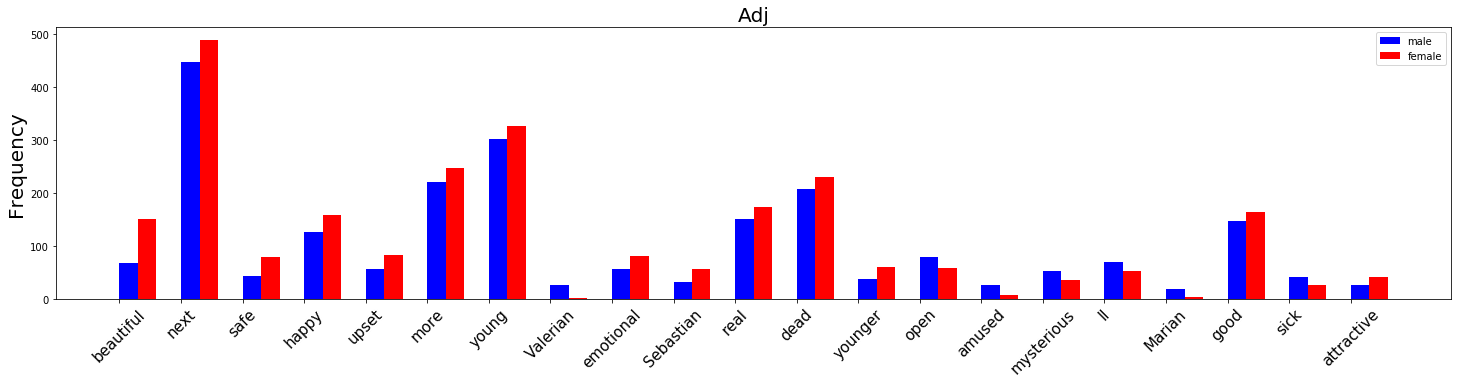

In [145]:
fig = plt.figure(figsize=(25,5))
# ax=fig.add_subplot(4,1,1)
index=np.arange(len(all_adj_e1))
m=all_adj_e1['male_adj'].values
f=all_adj_e1['female_adj'].values
bar_width=0.3
plt.bar(index,m,bar_width,color='b',label='male')
plt.bar(index+bar_width,f,bar_width,color='r',label='female')
plt.ylabel('Frequency',fontsize=20)
plt.xticks(rotation=45,fontsize=15)
plt.xticks([i-0.15 for i in index],[i for i in all_adj_e1['adj'].values])
plt.title('Adj',fontsize=20)
plt.legend()
plt.show()

In [135]:
all_adj_e['female_adj'].sum()

11724

In [136]:
all_adj_e['male_adj'].sum()

11493

In [123]:
len(all_adj_e)

1351

In [144]:
all_verb=pd.DataFrame(list(set(female_verb)&set(male_verb)),columns=['verb'])

In [146]:
all_verb['score']=all_verb['verb'].apply(lambda x: ediction[x] if x in ediction else np.nan)

In [147]:
def dic(x):
    diction = {}
    cnt = Counter(x)
    for word, freq in cnt.items():
        diction[word] = freq
    return diction

In [149]:
diction=dic(female_verb)
all_verb['female_verb']=all_verb['verb'].apply(lambda x: diction[x] if x in diction else np.nan)

diction=dic(male_verb)
all_verb['male_verb']=all_verb['verb'].apply(lambda x: diction[x] if x in diction else np.nan)

In [159]:
all_verb_e=all_verb[(all_verb['score']<-5)|(all_verb['score']>5)]

In [160]:
all_verb_e['distance']=abs(all_verb_e['female_verb']-all_verb_e['male_verb'])

/home/sysadmin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [167]:
all_verb_e1=all_verb_e.sort_values(by='distance',ascending=False)[:21]

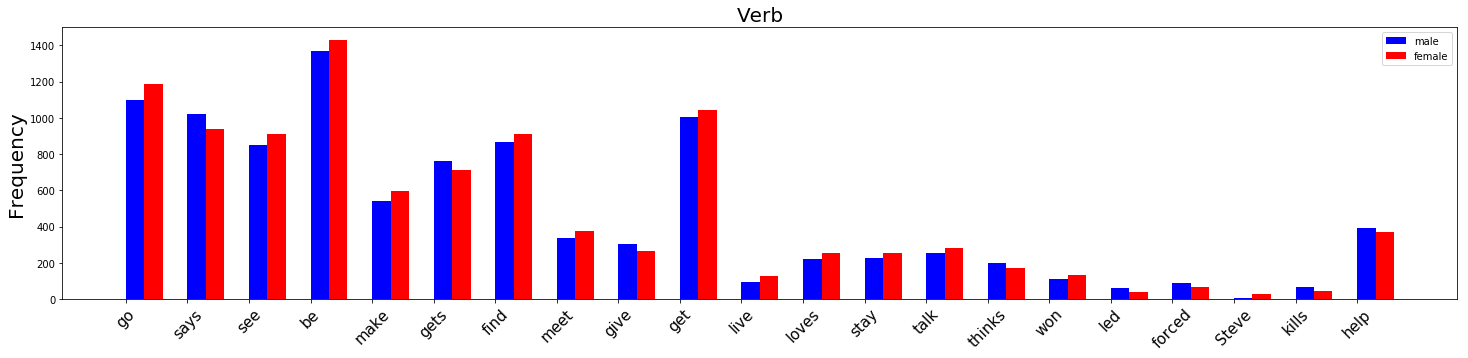

In [171]:
fig = plt.figure(figsize=(25,5))
# ax=fig.add_subplot(4,1,1)
index=np.arange(len(all_adj_e1))
m=all_verb_e1['male_verb'].values
f=all_verb_e1['female_verb'].values
bar_width=0.3
plt.bar(index,m,bar_width,color='b',label='male')
plt.bar(index+bar_width,f,bar_width,color='r',label='female')
plt.ylabel('Frequency',fontsize=20)
plt.xticks(rotation=45,fontsize=15)
plt.xticks([i-0.15 for i in index],[i for i in all_verb_e1['verb'].values])
plt.title('Verb',fontsize=20)
plt.legend()
plt.show()

In [155]:
all_verb_e1['female_verb'].sum()

47562

In [156]:
all_verb_e1['male_verb'].sum()

47272

### accurate interaction

In [151]:
def extend(x):
    c=[]
    for n,i in enumerate(IMDB[x].values):
        match = re.findall('\[.*?\]', i[1:-1])
        match =[re.findall(r'[[](.*?)[]]', j)[0].split(', ') for j in match]
        tp=IMDB['tp'].values[n]
        a=[]
        [a.extend(q) for k,q in enumerate(match) if k in tp]
        a=[j for j in a if len(j)>0]
        c.extend(a)
    return c

In [26]:
len(IMDB['tp'].values)

6657

In [152]:
female_adj=extend('f_adjs')
male_adj=extend('m_adjs')
female_verb=extend('f_verbs')
male_verb=extend('m_verbs')

In [184]:
len(female_adj)

3754

In [185]:
len(male_adj)

3810

In [186]:
len(female_verb)

50506

In [187]:
len(male_verb)

54595

In [158]:
all_adj=pd.DataFrame(list(set(female_adj)&set(male_adj)),columns=['adj'])

In [159]:
all_adj['score']=all_adj['adj'].apply(lambda x: ediction[x] if x in ediction else np.nan)

In [160]:
def dic(x):
    diction = {}
    cnt = Counter(x)
    for word, freq in cnt.items():
        diction[word] = freq
    return diction

In [161]:
diction=dic(female_adj)
all_adj['female_adj']=all_adj['adj'].apply(lambda x: diction[x] if x in diction else np.nan)

diction=dic(male_adj)
all_adj['male_adj']=all_adj['adj'].apply(lambda x: diction[x] if x in diction else np.nan)

In [226]:
all_adj_e=all_adj[(all_adj['score']<-5)|(all_adj['score']>5)]

In [227]:
all_adj_e['distance']=abs(all_adj_e['female_adj']-all_adj_e['male_adj'])

/home/sysadmin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [228]:
all_adj_e1=all_adj_e.sort_values(by='distance',ascending=False)

In [229]:
all_adj_e1['male_score']=abs(all_adj_e1['score']*all_adj_e1['male_adj'])

In [230]:
all_adj_e1['female_score']=abs(all_adj_e1['score']*all_adj_e1['female_adj'])

In [231]:
all_adj_e1['female_adj'].sum()

1419

In [232]:
all_adj_e1['male_adj'].sum()

1472

In [233]:
all_adj_e1['female_score'].mean()

68.56137136676244

In [234]:
all_adj_e1['male_score'].mean()

69.47265660531333

In [235]:
all_verb=pd.DataFrame(list(set(female_verb)&set(male_verb)),columns=['verb'])

In [236]:
all_verb['score']=all_verb['verb'].apply(lambda x: ediction[x] if x in ediction else np.nan)

In [237]:
def dic(x):
    diction = {}
    cnt = Counter(x)
    for word, freq in cnt.items():
        diction[word] = freq
    return diction

In [238]:
diction=dic(female_verb)
all_verb['female_verb']=all_verb['verb'].apply(lambda x: diction[x] if x in diction else np.nan)

diction=dic(male_verb)
all_verb['male_verb']=all_verb['verb'].apply(lambda x: diction[x] if x in diction else np.nan)

In [239]:
all_verb_e=all_verb[(all_verb['score']<-5)|(all_verb['score']>5)]

In [175]:
all_verb_e['distance']=abs(all_verb_e['female_verb']-all_verb_e['male_verb'])

/home/sysadmin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [221]:
all_verb_e1=all_verb_e.sort_values(by='male_verb',ascending=False)[:40]

In [209]:
all_verb_e1['male_score']=abs(all_verb_e1['score']*all_verb_e1['male_verb'])

In [210]:
all_verb_e1['female_score']=abs(all_verb_e1['score']*all_verb_e1['female_verb'])

In [211]:
all_verb_e1['male_score'].mean()

1845.7731023072113

In [212]:
all_verb_e1['female_score'].mean()

1748.5155520631517

In [213]:
all_verb_e1['female_score'].sem()

204.99303301154467

In [214]:
all_verb_e1['male_verb'].sum()

5048

In [215]:
all_verb_e1['female_verb'].sum()

4711

In [223]:
len(m)

20

In [224]:
len(index)

20

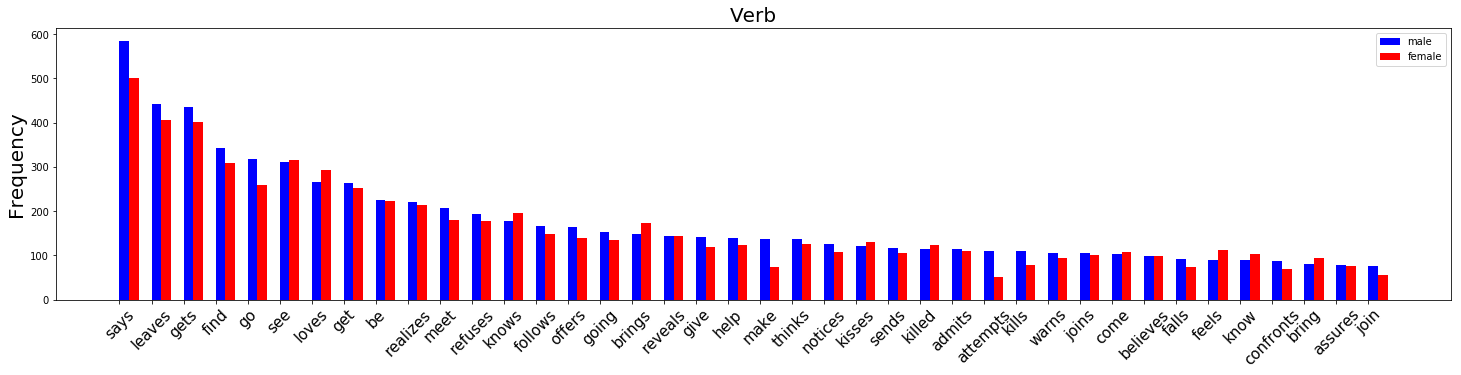

In [225]:
fig = plt.figure(figsize=(25,5))
# ax=fig.add_subplot(4,1,1)
index=np.arange(len(all_verb_e1))
m=all_verb_e1['male_verb'].values
f=all_verb_e1['female_verb'].values
bar_width=0.3
plt.bar(index,m,bar_width,color='b',label='male')
plt.bar(index+bar_width,f,bar_width,color='r',label='female')
plt.ylabel('Frequency',fontsize=20)
plt.xticks(rotation=45,fontsize=15)
plt.xticks([i-0.15 for i in index],[i for i in all_verb_e1['verb'].values])
plt.title('Verb',fontsize=20)
plt.legend()
plt.show()

### all the data

In [8]:
def eval_(x):
    try:
        return eval(x)
    except:
        return np.nan
        pass

In [9]:
def ev(x,y):
    match = re.findall('\[.*?\]', x[1:-1])
    match =[re.findall(r'[[](.*?)[]]', j)[0].split(', ') for j in match]
    a=[]
    [a.extend(q) for k,q in enumerate(match) if k in y]
    a=[j for j in a if len(j)>1]
    return a

In [10]:
def ev1(x):
    match = re.findall('\[.*?\]', x[1:-1])
    match =[re.findall(r'[[](.*?)[]]', j)[0].split(', ') for j in match]
    a=[]
    [a.extend(q) for k,q in enumerate(match)]
    a=[j for j in a if len(j)>1]
    return a

In [11]:
IMDB=pd.read_csv('./IMDB/IMDB_e2.csv')
IMDB['tp']=IMDB['tp'].apply(lambda x: eval_(x))
IMDB['up']=IMDB['up'].apply(lambda x: eval_(x))

In [12]:
IMDB['m_adjs1']=IMDB.apply(lambda row: ev(row.m_adjs,row.up), axis=1)
IMDB['f_adjs1']=IMDB.apply(lambda row: ev(row.f_adjs,row.up), axis=1)
IMDB['m_verbs1']=IMDB.apply(lambda row: ev(row.m_verbs,row.up), axis=1)
IMDB['f_verbs1']=IMDB.apply(lambda row: ev(row.f_verbs,row.up), axis=1)

In [13]:
# IMDB['m_adjs2']=IMDB.apply(lambda row: ev1(row.m_adjs), axis=1)
# IMDB['f_adjs2']=IMDB.apply(lambda row: ev1(row.f_adjs), axis=1)
# IMDB['m_verbs2']=IMDB.apply(lambda row: ev1(row.m_verbs), axis=1)
# IMDB['f_verbs2']=IMDB.apply(lambda row: ev1(row.f_verbs), axis=1)

In [14]:
# IMDB['m_adjs2_c']=IMDB['m_adjs2'].apply(lambda x: len(x))
# IMDB['f_adjs2_c']=IMDB['f_adjs2'].apply(lambda x: len(x))
# IMDB['m_verbs2_c']=IMDB['m_verbs2'].apply(lambda x: len(x))
# IMDB['f_verbs2_c']=IMDB['f_verbs2'].apply(lambda x: len(x))

In [15]:
IMDB['m_adjs_c']=IMDB['m_adjs1'].apply(lambda x: len(x))
IMDB['f_adjs_c']=IMDB['f_adjs1'].apply(lambda x: len(x))
IMDB['m_verbs_c']=IMDB['m_verbs1'].apply(lambda x: len(x))
IMDB['f_verbs_c']=IMDB['f_verbs1'].apply(lambda x: len(x))

In [16]:
len(IMDB.dropna(axis=0,how='any',subset=['up']))

6087

In [17]:
IMDB['m_adjs_p']=IMDB.apply(lambda row: len(row.m_adjs1)/len(row.up) if len(row.up)>0 else np.nan,axis=1)
IMDB['f_adjs_p']=IMDB.apply(lambda row: len(row.f_adjs1)/len(row.up) if len(row.up)>0 else np.nan,axis=1)
IMDB['m_verbs_p']=IMDB.apply(lambda row: len(row.m_verbs1)/len(row.up) if len(row.up)>0 else np.nan,axis=1)
IMDB['f_verbs_p']=IMDB.apply(lambda row: len(row.f_verbs1)/len(row.up) if len(row.up)>0 else np.nan,axis=1)

In [18]:
# IMDB['m_adjs_t']=IMDB['m_adjs1'].apply(lambda x: np.mean([abs(ediction[i]) for i in x if i in ediction if (ediction[i]<-3) | (ediction[i]>3)]))
# IMDB['f_adjs_t']=IMDB['f_adjs1'].apply(lambda x: np.mean([abs(ediction[i]) for i in x if i in ediction if (ediction[i]<-3) | (ediction[i]>3)]))
# IMDB['m_verbs_t']=IMDB['m_verbs1'].apply(lambda x: np.mean([abs(ediction[i]) for i in x if i in ediction if (ediction[i]<-3) | (ediction[i]>3)]))
# IMDB['f_verbs_t']=IMDB['f_verbs1'].apply(lambda x: np.mean([abs(ediction[i]) for i in x if i in ediction if (ediction[i]<-3) | (ediction[i]>3)]))

In [19]:
IMDB=IMDB.dropna(axis=0,how='any',subset=['m_verbs_p','f_verbs_p'])

In [20]:
movie_long=pd.read_csv('./movie_type_e2.csv')
movie_long['tp']=movie_long['tp'].apply(lambda x: eval_(x))

In [21]:
movie_long['up']=movie_long['up'].apply(lambda x: eval_(x))

In [22]:
movie_long['m_adjs1']=movie_long.apply(lambda row: ev(row.m_adjs,row.up), axis=1)
movie_long['f_adjs1']=movie_long.apply(lambda row: ev(row.f_adjs,row.up), axis=1)
movie_long['m_verbs1']=movie_long.apply(lambda row: ev(row.m_verbs,row.up), axis=1)
movie_long['f_verbs1']=movie_long.apply(lambda row: ev(row.f_verbs,row.up), axis=1)

In [23]:
movie_long['m_adjs_c']=movie_long['m_adjs1'].apply(lambda x: len(x))
movie_long['f_adjs_c']=movie_long['f_adjs1'].apply(lambda x: len(x))
movie_long['m_verbs_c']=movie_long['m_verbs1'].apply(lambda x: len(x))
movie_long['f_verbs_c']=movie_long['f_verbs1'].apply(lambda x: len(x))

In [24]:
movie_long['m_adjs_p']=movie_long.apply(lambda row: len(row.m_adjs1)/len(row.up) if len(row.up)>0 else np.nan,axis=1)
movie_long['f_adjs_p']=movie_long.apply(lambda row: len(row.f_adjs1)/len(row.up) if len(row.up)>0 else np.nan,axis=1)
movie_long['m_verbs_p']=movie_long.apply(lambda row: len(row.m_verbs1)/len(row.up) if len(row.up)>0 else np.nan,axis=1)
movie_long['f_verbs_p']=movie_long.apply(lambda row: len(row.f_verbs1)/len(row.up) if len(row.up)>0 else np.nan,axis=1)

In [25]:
movie_long=movie_long.dropna(axis=0,how='any',subset=['m_verbs_p','f_verbs_p'])

In [28]:
movie_long['m_adjs_t']=movie_long['m_adjs1'].apply(lambda x: np.mean([abs(ediction[i]) for i in x if i in ediction if (ediction[i]<-3) | (ediction[i]>3)]))
movie_long['f_adjs_t']=movie_long['f_adjs1'].apply(lambda x: np.mean([abs(ediction[i]) for i in x if i in ediction if (ediction[i]<-3) | (ediction[i]>3)]))
movie_long['m_verbs_t']=movie_long['m_verbs1'].apply(lambda x: np.mean([abs(ediction[i]) for i in x if i in ediction if (ediction[i]<-3) | (ediction[i]>3)]))
movie_long['f_verbs_t']=movie_long['f_verbs1'].apply(lambda x: np.mean([abs(ediction[i]) for i in x if i in ediction if (ediction[i]<-3) | (ediction[i]>3)]))

/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


In [29]:
book=pd.read_csv('./book.csv')
book['tp']=book['tp'].apply(lambda x: eval_(x))
book['up']=book['up'].apply(lambda x: eval_(x))

In [30]:
book['m_adjs1']=book.apply(lambda row: ev(row.m_adjs,row.up), axis=1)
book['f_adjs1']=book.apply(lambda row: ev(row.f_adjs,row.up), axis=1)
book['m_verbs1']=book.apply(lambda row: ev(row.m_verbs,row.up), axis=1)
book['f_verbs1']=book.apply(lambda row: ev(row.f_verbs,row.up), axis=1)

In [31]:
book['m_adjs_c']=book['m_adjs1'].apply(lambda x: len(x))
book['f_adjs_c']=book['f_adjs1'].apply(lambda x: len(x))
book['m_verbs_c']=book['m_verbs1'].apply(lambda x: len(x))
book['f_verbs_c']=book['f_verbs1'].apply(lambda x: len(x))

In [32]:
book['m_adjs_p']=book.apply(lambda row: len(row.m_adjs1)/len(row.up) if len(row.up)>0 else np.nan,axis=1)
book['f_adjs_p']=book.apply(lambda row: len(row.f_adjs1)/len(row.up) if len(row.up)>0 else np.nan,axis=1)
book['m_verbs_p']=book.apply(lambda row: len(row.m_verbs1)/len(row.up) if len(row.up)>0 else np.nan,axis=1)
book['f_verbs_p']=book.apply(lambda row: len(row.f_verbs1)/len(row.up) if len(row.up)>0 else np.nan,axis=1)

In [47]:
# book['m_adjs_t']=book['m_adjs1'].apply(lambda x: np.mean([abs(ediction[i]) for i in x if i in ediction if (ediction[i]<-3) | (ediction[i]>3)]))
# book['f_adjs_t']=book['f_adjs1'].apply(lambda x: np.mean([abs(ediction[i]) for i in x if i in ediction if (ediction[i]<-3) | (ediction[i]>3)]))
# book['m_verbs_t']=book['m_verbs1'].apply(lambda x: np.mean([abs(ediction[i]) for i in x if i in ediction if (ediction[i]<-3) | (ediction[i]>3)]))
# book['f_verbs_t']=book['f_verbs1'].apply(lambda x: np.mean([abs(ediction[i]) for i in x if i in ediction if (ediction[i]<-3) | (ediction[i]>3)]))

In [33]:
book=book.dropna(axis=0,how='any',subset=['m_verbs_p','f_verbs_p'])

In [34]:
v,p=stats.ttest_ind([i for i in book['m_verbs_p'].values], [i for i in book['f_verbs_p'].values])
p

0.03260435587840301

In [35]:
def gender (x,y):
    a=pd.DataFrame()
    a['verbs_c']=x
    a['gender']='male'
    b=pd.DataFrame()
    b['verbs_c']=y
    b['gender']='female'
    a=a.append(b)
    return a

/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


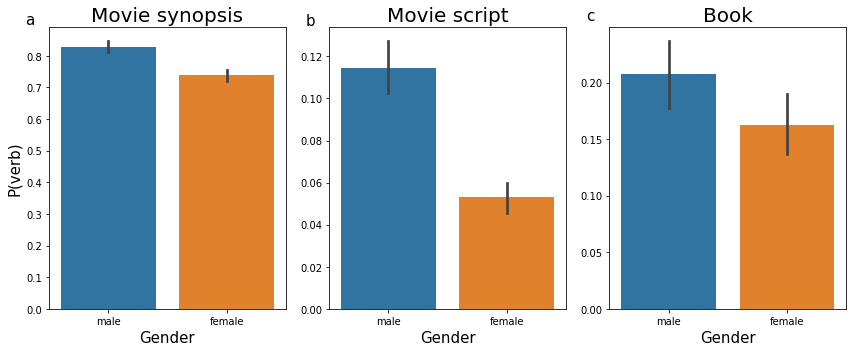

In [45]:
fig = plt.figure(figsize=(12,5))
ax=fig.add_subplot(1,3,1)
a=gender(IMDB['m_verbs_p'].values,IMDB['f_verbs_p'].values)
sns.barplot(x='gender',y='verbs_c',data = a)
ax.set_xlabel('Gender',fontsize=15)
ax.set_ylabel('P(verb)',fontsize=15)
plt.text(-0.7,0.9,'a',fontsize=15)
plt.title('Movie synopsis',fontsize=20)
ax=fig.add_subplot(1,3,2)
a=gender(movie_long['m_verbs_p'].values,movie_long['f_verbs_p'].values)
sns.barplot(x='gender',y='verbs_c',data = a)
ax.set_xlabel('Gender',fontsize=15)
ax.set_ylabel(None,fontsize=15)
plt.text(-0.7,0.135,'b',fontsize=15)
plt.title('Movie script',fontsize=20)
ax=fig.add_subplot(1,3,3)
a=gender(book['m_verbs_p'].values,book['f_verbs_p'].values)
sns.barplot(x='gender',y='verbs_c',data = a)
ax.set_xlabel('Gender',fontsize=15)
ax.set_ylabel(None,fontsize=15)
plt.title('Book',fontsize=20)
plt.text(-0.7,0.255,'c',fontsize=15)
plt.tight_layout()
plt.savefig('./picture/figure7.tiff',dpi=300)
plt.show()

/home/sysadmin/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


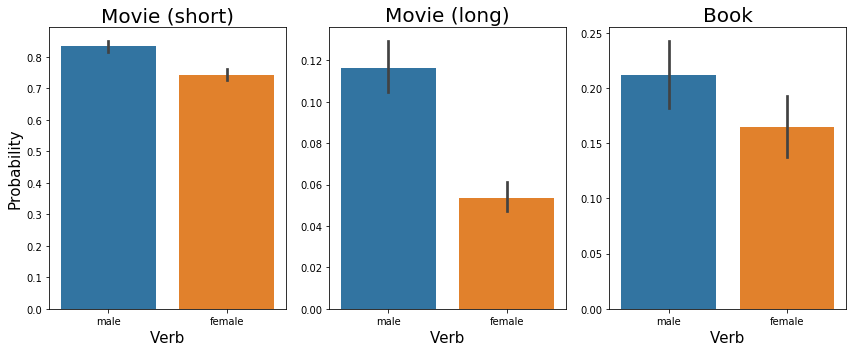

In [74]:
fig = plt.figure(figsize=(12,5))
ax=fig.add_subplot(1,3,1)
a=gender(IMDB['m_verbs_p'].values,IMDB['f_verbs_p'].values)
sns.barplot(x='gender',y='verbs_c',data = a)
ax.set_xlabel('Gender',fontsize=15)
ax.set_ylabel('P(Verb)',fontsize=15)
plt.title('Movie (short)',fontsize=20)
ax=fig.add_subplot(1,3,2)
a=gender(movie_long['m_verbs_p'].values,movie_long['f_verbs_p'].values)
sns.barplot(x='gender',y='verbs_c',data = a)
ax.set_xlabel('Gender',fontsize=15)
ax.set_ylabel(None,fontsize=15)
plt.title('Movie (long)',fontsize=20)
ax=fig.add_subplot(1,3,3)
a=gender(book['m_verbs_p'].values,book['f_verbs_p'].values)
sns.barplot(x='gender',y='verbs_c',data = a)
ax.set_xlabel('Gender',fontsize=15)
ax.set_ylabel(None,fontsize=15)
plt.title('Book',fontsize=20)
plt.tight_layout()
plt.show()

/home/sysadmin/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


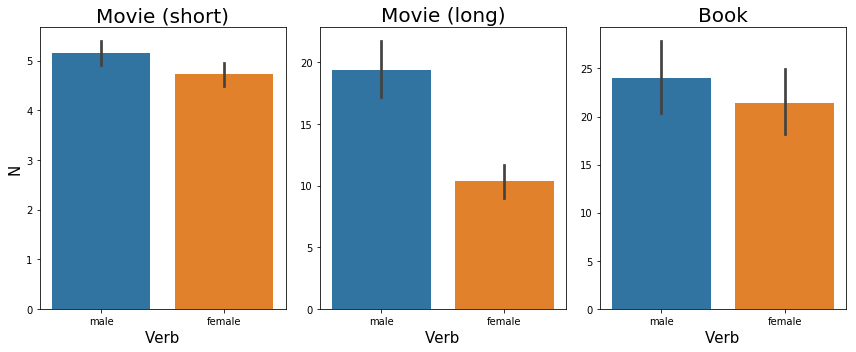

In [52]:
fig = plt.figure(figsize=(12,5))
ax=fig.add_subplot(1,3,1)
a=gender(IMDB['m_verbs_c'].values,IMDB['f_verbs_c'].values)
sns.barplot(x='gender',y='verbs_c',data = a)
ax.set_xlabel('Verb',fontsize=15)
ax.set_ylabel('N',fontsize=15)
plt.title('Movie (short)',fontsize=20)
ax=fig.add_subplot(1,3,2)
a=gender(movie_long['m_verbs_c'].values,movie_long['f_verbs_c'].values)
sns.barplot(x='gender',y='verbs_c',data = a)
ax.set_xlabel('Verb',fontsize=15)
ax.set_ylabel(None,fontsize=15)
plt.title('Movie (long)',fontsize=20)
ax=fig.add_subplot(1,3,3)
a=gender(book['m_verbs_c'].values,book['f_verbs_c'].values)
sns.barplot(x='gender',y='verbs_c',data = a)
ax.set_xlabel('Verb',fontsize=15)
ax.set_ylabel(None,fontsize=15)
plt.title('Book',fontsize=20)
plt.tight_layout()
plt.show()

/home/sysadmin/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


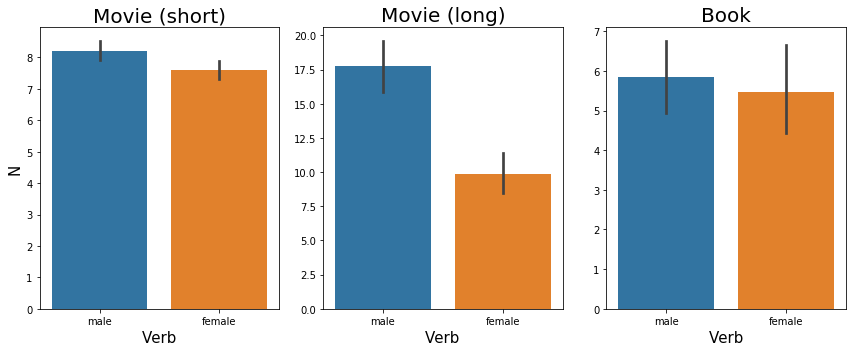

In [334]:
fig = plt.figure(figsize=(12,5))
ax=fig.add_subplot(1,3,1)
a=gender(IMDB['m_verbs_c'].values,IMDB['f_verbs_c'].values)
sns.barplot(x='gender',y='verbs_c',data = a)
ax.set_xlabel('Verb',fontsize=15)
ax.set_ylabel('N',fontsize=15)
plt.title('Movie (short)',fontsize=20)
ax=fig.add_subplot(1,3,2)
a=gender(movie_long['m_verbs_c'].values,movie_long['f_verbs_c'].values)
sns.barplot(x='gender',y='verbs_c',data = a)
ax.set_xlabel('Verb',fontsize=15)
ax.set_ylabel(None,fontsize=15)
plt.title('Movie (long)',fontsize=20)
ax=fig.add_subplot(1,3,3)
a=gender(book['m_verbs_c'].values,book['f_verbs_c'].values)
sns.barplot(x='gender',y='verbs_c',data = a)
ax.set_xlabel('Verb',fontsize=15)
ax.set_ylabel(None,fontsize=15)
plt.title('Book',fontsize=20)
plt.tight_layout()
plt.show()

/home/sysadmin/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


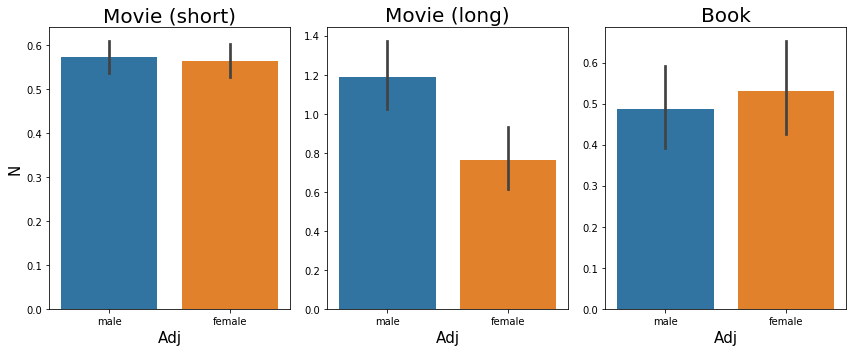

In [349]:
fig = plt.figure(figsize=(12,5))
ax=fig.add_subplot(1,3,1)
a=gender(IMDB['m_adjs_c'].values,IMDB['f_adjs_c'].values)
sns.barplot(x='gender',y='verbs_c',data = a)
ax.set_xlabel('Adj',fontsize=15)
ax.set_ylabel('N',fontsize=15)
plt.title('Movie (short)',fontsize=20)
ax=fig.add_subplot(1,3,2)
a=gender(movie_long['m_adjs_c'].values,movie_long['f_adjs_c'].values)
sns.barplot(x='gender',y='verbs_c',data = a)
ax.set_xlabel('Adj',fontsize=15)
ax.set_ylabel(None,fontsize=15)
plt.title('Movie (long)',fontsize=20)
ax=fig.add_subplot(1,3,3)
a=gender(book['m_adjs_c'].values,book['f_adjs_c'].values)
sns.barplot(x='gender',y='verbs_c',data = a)
ax.set_xlabel('Adj',fontsize=15)
ax.set_ylabel(None,fontsize=15)
plt.title('Book',fontsize=20)
plt.tight_layout()
plt.show()

/home/sysadmin/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


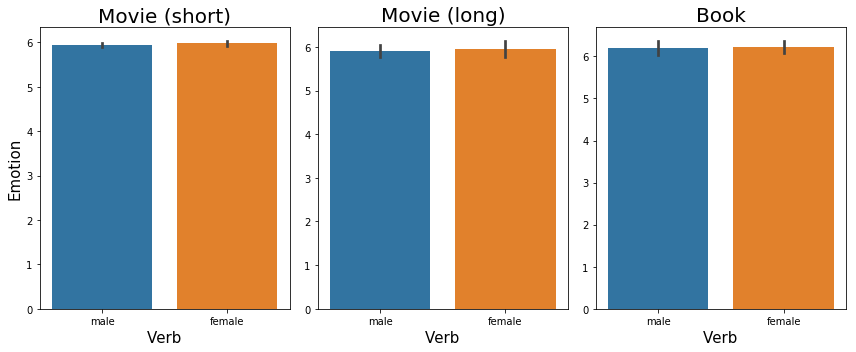

In [381]:
fig = plt.figure(figsize=(12,5))
ax=fig.add_subplot(1,3,1)
a=gender(IMDB['m_verbs_t'].values,IMDB['f_verbs_t'].values)
sns.barplot(x='gender',y='verbs_c',data = a)
ax.set_xlabel('Verb',fontsize=15)
ax.set_ylabel('Emotion',fontsize=15)
plt.title('Movie (short)',fontsize=20)
ax=fig.add_subplot(1,3,2)
a=gender(movie_long['m_verbs_t'].values,movie_long['f_verbs_t'].values)
sns.barplot(x='gender',y='verbs_c',data = a)
ax.set_xlabel('Verb',fontsize=15)
ax.set_ylabel(None,fontsize=15)
plt.title('Movie (long)',fontsize=20)
ax=fig.add_subplot(1,3,3)
a=gender(book['m_verbs_t'].values,book['f_verbs_t'].values)
sns.barplot(x='gender',y='verbs_c',data = a)
ax.set_xlabel('Verb',fontsize=15)
ax.set_ylabel(None,fontsize=15)
plt.title('Book',fontsize=20)
plt.tight_layout()
plt.show()

/home/sysadmin/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


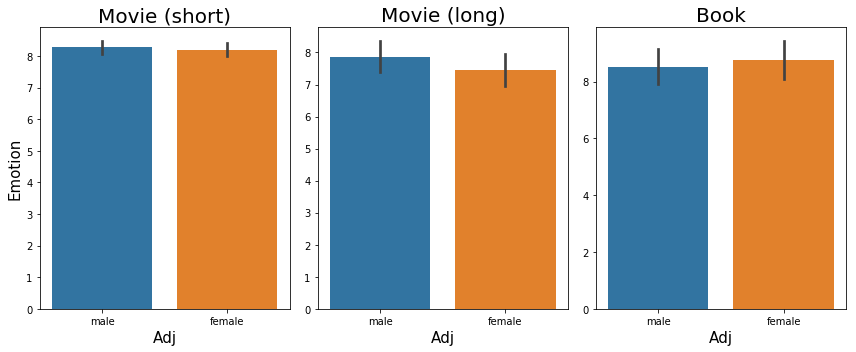

In [382]:
fig = plt.figure(figsize=(12,5))
ax=fig.add_subplot(1,3,1)
a=gender(IMDB['m_adjs_t'].values,IMDB['f_adjs_t'].values)
sns.barplot(x='gender',y='verbs_c',data = a)
ax.set_xlabel('Adj',fontsize=15)
ax.set_ylabel('Emotion',fontsize=15)
plt.title('Movie (short)',fontsize=20)
ax=fig.add_subplot(1,3,2)
a=gender(movie_long['m_adjs_t'].values,movie_long['f_adjs_t'].values)
sns.barplot(x='gender',y='verbs_c',data = a)
ax.set_xlabel('Adj',fontsize=15)
ax.set_ylabel(None,fontsize=15)
plt.title('Movie (long)',fontsize=20)
ax=fig.add_subplot(1,3,3)
a=gender(book['m_adjs_t'].values,book['f_adjs_t'].values)
sns.barplot(x='gender',y='verbs_c',data = a)
ax.set_xlabel('Adj',fontsize=15)
ax.set_ylabel(None,fontsize=15)
plt.title('Book',fontsize=20)
plt.tight_layout()
plt.show()

### correlation

In [21]:
IMDB=pd.read_csv('./IMDB/IMDB_e2.csv')
IMDB['tp']=IMDB['tp'].apply(lambda x: eval_(x))
IMDB['up']=IMDB['up'].apply(lambda x: eval_(x))
IMDB['up1']=IMDB['up1'].apply(lambda x: eval_(x))
IMDB['emotion']=IMDB['emotion'].apply(lambda x: eval_(x))

In [22]:
IMDB['n_e']=IMDB['emotion'].apply(lambda x: normalized(x))

In [23]:
def ev2(x):
    match = re.findall('\[.*?\]', x[1:-1])
    match =[re.findall(r'[[](.*?)[]]', j)[0].split(', ') for j in match]
    a=[]
    [a.append(q) for k,q in enumerate(match)]
    b=[q for q,j in enumerate(a) if len(j)>1]
    return b

In [24]:
IMDB['f_verbs1']=IMDB.apply(lambda row: ev2(row.f_verbs), axis=1) #identify the female location
IMDB['m_verbs1']=IMDB.apply(lambda row: ev2(row.m_verbs), axis=1) #identify the male location

In [25]:
IMDB['up2']=IMDB['up1'].apply(lambda x: [i[0] for i in x]) # the beginning of encounter

In [26]:
IMDB['up3']=IMDB['up1'].apply(lambda x: [i[1] for i in x]) # the end of encounter

In [59]:
len(IMDB)

786

In [51]:
def f_e(x,y,z): 
    try:
        a=[]
        for i in x:
            b=[]
            for j in y:
                b.append(i-j)
            a.append(np.argmin([q for q in b if q>0]))
        a=np.mean([z[y[i]] for i in a])
        return a
    except Exception as e:
        return np.nan

In [52]:
IMDB['f_verbs2']=IMDB.apply(lambda row: f_e(row.up2,row.f_verbs1,row.n_e),axis=1) #identify the female emotion location before encounter
IMDB['m_verbs2']=IMDB.apply(lambda row: f_e(row.up2,row.m_verbs1,row.n_e),axis=1) #identify the male emotion location before encounter

/home/sysadmin/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/sysadmin/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [53]:
IMDB[IMDB['tconst']=='tt1661199']['f_verbs2'].values[0]

0.04734103129568158

In [49]:
IMDB[IMDB['tconst']=='tt1661199']['m_verbs2'].values[0]

nan

In [40]:
IMDB[IMDB['tconst']=='tt1661199']['m_verbs2'].values[0]

nan

In [190]:
IMDB[IMDB['tconst']=='tt1661199']['up1'].values[0]

[[28, 35], [52, 59], [75, 76], [89, 90], [95, 96]]

In [268]:
IMDB[IMDB['tconst']=='tt1661199']['f_e2'].values[0]

2.445998831350534

In [201]:
# IMDB['f_e']=IMDB.apply(lambda row: np.mean([row.n_e[i] for i in row.f_verbs2]) if type(row.f_verbs2)==list else np.nan,axis=1)
IMDB['f_e']=IMDB.apply(lambda row: [row.n_e[i] for i in row.f_verbs2] if type(row.f_verbs2)==list else np.nan,axis=1)

/home/sysadmin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [211]:
# IMDB['f_e1']=IMDB.apply(lambda row: np.mean([row.n_e[i] for i in row.up2]) if type(row.up2)==list else np.nan,axis=1)
IMDB['f_e1']=IMDB.apply(lambda row: [row.n_e[i] for i in row.up2] if type(row.up2)==list else np.nan,axis=1)

In [258]:
IMDB['f_e2']=IMDB.apply(lambda row: np.sum([row.f_e1[i] - row.f_e[i] for i in range(len(row.f_e))]),axis=1) # the emotion diffrence between before and after 

In [252]:
def ev(x,y):
    match = re.findall('\[.*?\]', x[1:-1])
    match =[re.findall(r'[[](.*?)[]]', j)[0].split(', ') for j in match]
    a=[]
    [a.extend(q) for k,q in enumerate(match) if k in y]
    a=[j for j in a if len(j)>1]
    return a

In [269]:
IMDB['m_verbs1']=IMDB.apply(lambda row: ev(row.m_verbs,row.up), axis=1)
IMDB['f_verbs1']=IMDB.apply(lambda row: ev(row.f_verbs,row.up), axis=1)

In [270]:
IMDB['m_verbs_c']=IMDB['m_verbs1'].apply(lambda x: len(x))
IMDB['f_verbs_c']=IMDB['f_verbs1'].apply(lambda x: len(x))

In [273]:
IMDB['m_f']=IMDB['m_verbs_c']/(IMDB['m_verbs_c']+IMDB['f_verbs_c'])

In [272]:
IMDB[IMDB['tconst']=='tt1661199']['m_verbs_c'].values[0]

23

In [271]:
IMDB[IMDB['tconst']=='tt1661199']['f_verbs_c'].values[0]

15

In [54]:
IMDB=IMDB.dropna(axis=0,how='any',subset=['f_verbs2','m_verbs2'])

In [287]:
import statsmodels.api as sm

y = IMDB['f_e2'].values # target
X = IMDB['m_f'].values  # features
# add a column of 1's as the constant term
X = sm.add_constant(X)  

# OLS -- Ordinary Least Squares Fit
linear = sm.OLS(y, X)
# fit model
linearfit = linear.fit()
print(linearfit.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.140
Date:                Wed, 05 Jun 2019   Prob (F-statistic):              0.144
Time:                        17:31:53   Log-Likelihood:                -2723.0
No. Observations:                1268   AIC:                             5450.
Df Residuals:                    1266   BIC:                             5460.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2445      0.135     -1.805      0.0

In [57]:
IMDB['f_verbs2'].describe()

count    786.000000
mean       0.024923
std        0.709889
min       -3.262644
25%       -0.445669
50%        0.060982
75%        0.478553
max        2.464495
Name: f_verbs2, dtype: float64

In [58]:
IMDB['m_verbs2'].describe()

count    786.000000
mean      -0.029629
std        0.696354
min       -3.262644
25%       -0.425531
50%       -0.006549
75%        0.429643
max        2.385966
Name: m_verbs2, dtype: float64

In [197]:
IMDB=IMDB.dropna(axis=0,how='any',subset=['f_e','f_e1'])

In [55]:
v,p=stats.ttest_ind([i for i in IMDB['f_verbs2'].values], [i for i in IMDB['m_verbs2'].values])
p

0.12425235992070598

In [199]:
def b_a (x,y):
    a=pd.DataFrame()
    a['verbs_c']=x
    a['gender']='before'
    b=pd.DataFrame()
    b['verbs_c']=y
    b['gender']='after'
    a=a.append(b)
    return a

/home/sysadmin/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


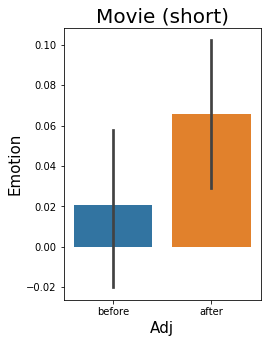

In [200]:
fig = plt.figure(figsize=(12,5))
ax=fig.add_subplot(1,3,1)
a=b_a(IMDB['f_e'].values,IMDB['f_e1'].values)
sns.barplot(x='gender',y='verbs_c',data = a)
ax.set_xlabel('Adj',fontsize=15)
ax.set_ylabel('Emotion',fontsize=15)
plt.title('Movie (short)',fontsize=20)
plt.show()

### all the neighbours

In [41]:
IMDB=pd.read_csv('./IMDB/IMDB_e2.csv')

In [42]:
def eval_(x):
    try:
        return eval(x)
    except:
        return np.nan
        pass

In [43]:
IMDB['female_all']=IMDB['female_all'].apply(lambda x: eval_(x))
IMDB['male_all']=IMDB['male_all'].apply(lambda x: eval_(x))

In [44]:
def extend(x):
    c=[]
    for i in IMDB[x].values:
        a=[]
        [a.extend(j) for j in i]
        c.extend(a)
    return c

In [45]:
female_all=extend('female_all')
male_all=extend('male_all')

In [32]:
# all_=female_all+male_all

In [49]:
edge=[]
# for i in female_all:
for i in male_all:
    a=[sorted(i) for i in list(combinations(i,2))]
    b=[]
    for j in a:
        if (j[0] in ediction) & (j[1] in ediction):
            if ((ediction[j[0]]>3) | (ediction[j[0]]<-3))& ((ediction[j[1]]>3) | (ediction[j[1]]<-3)):
                b.append(j)
    edge.extend(b)

In [50]:
d=pd.DataFrame()
d['a']=[i[0] for i in edge]
d['b']=[i[1] for i in edge]

In [51]:
# d.to_csv('edge_f.csv',index=False)
d.to_csv('edge_m.csv',index=False)

In [26]:
len(d)

330948

In [13]:
node=pd.read_csv('/Users/xuhuimin/Desktop/node_f.csv')

In [14]:
node['Phylum']=node['Id'].apply(lambda x: nltk.pos_tag([x])[0][1] if len(nltk.pos_tag([x])[0])==2 else 'Other')

In [15]:
node.to_csv('/Users/xuhuimin/Desktop/node_f.csv',index=False)